<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/notebooks/retail_out_of_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
rng = np.random.default_rng(123)

In [2]:
def plot_conf(**args):
    plt.gca().set(**args)
    plt.tight_layout()
    plt.show()

In [3]:
x = rng.standard_normal((100, 2))

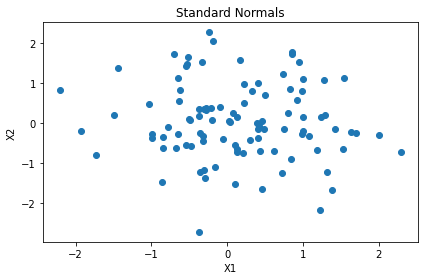

In [4]:
plt.scatter(x[:, 0], x[:, 1])
plot_conf(title="Standard Normals", xlabel="X1", ylabel="X2")

In [9]:
n_dates = 721
start_date1 = "2018-01-01"
dates = pd.date_range(start_date1, periods=n_dates, freq="D")
avg = 50
p1 = 60
series1 = np.insert(np.zeros(p1 - 1), 0, avg)
n1 = int(np.ceil(n_dates / p1))
demand = np.tile(series1, n1)[:n_dates]

In [6]:
n_oos = 181
start_date2 = "2018-10-01"
oos = pd.date_range(start_date2, periods=n_oos, freq="D")
p2 = 7
n2 = int(np.ceil(n_oos / p2))
date_overlap = np.intersect1d(oos, dates, assume_unique=True)
mask_overlap = np.where(np.isin(dates, date_overlap))[0]
series2 = np.insert(np.zeros(p2 - 1), 0, avg)
demand[mask_overlap] = np.tile(series2, n2)[:n_oos]

In [7]:
np.unique(demand, return_counts=True)

(array([ 0., 50.]), array([685,  36]))

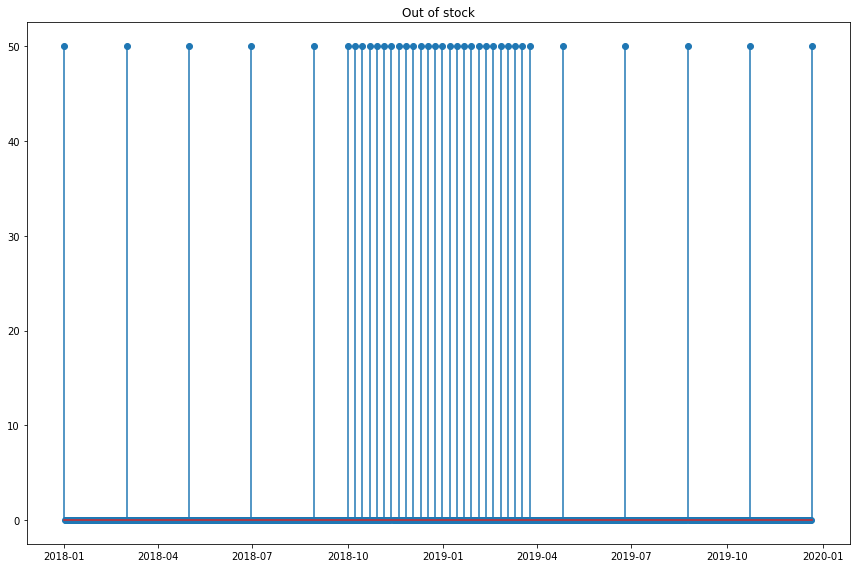

In [8]:
plt.figure(figsize=(12, 8))
plt.stem(dates, demand, use_line_collection=True)
plot_conf(title="Out of stock")